In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [89]:
import math
import os.path

import keras
import sklearn
import seaborn
import pandas
import numpy
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test, report, stm32convert


In [3]:
data = urbansound8k.load_dataset()
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
df = test.load_train_history('data/models')

Failed to load job sbcnn16k30-20190303-1949-a653-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190303-1949-a653-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190303-1949-a653-fold0/train.csv'
Failed to load job ldcnn20k60-20190306-0634-ce06-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190306-0634-ce06-fold0/train.csv' does not exist: b'data/models/ldcnn20k60-20190306-0634-ce06-fold0/train.csv'
Failed to load job sbcnn16k30-20190302-1902-f03a-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-1902-f03a-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-1902-f03a-fold0/train.csv'
Failed to load job sbcnn16k32aug-20190301-0240-abbd-fold0: [Errno 2] File b'data/models/sbcnn16k32aug-20190301-0240-abbd-fold0/train.csv' does not exist: b'data/models/sbcnn16k32aug-20190301-0240-abbd-fold0/train.csv'
Failed to load job ldcnn20k60-20190306-0525-0767-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190306-0525-0767-fold0/train.csv' does not exist: b'data/

Failed to load job sbcnn16k30-20190302-1828-e66d-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-1828-e66d-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-1828-e66d-fold0/train.csv'
Failed to load job ldcnn20k60-20190316-1420-3979-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190316-1420-3979-fold0/train.csv' does not exist: b'data/models/ldcnn20k60-20190316-1420-3979-fold0/train.csv'
Failed to load job sbcnn.orig-2019-02-26-02-12-2c8ffebe-fold0: too many values to unpack (expected 5)
Failed to load job sbcnn16k30-20190302-2052-6d84-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-2052-6d84-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-2052-6d84-fold0/train.csv'
Failed to load job sbcnn16k32aug-20190301-0147-7fe7-fold0: [Errno 2] File b'data/models/sbcnn16k32aug-20190301-0147-7fe7-fold0/train.csv' does not exist: b'data/models/sbcnn16k32aug-20190301-0147-7fe7-fold0/train.csv'
Failed to load job sbcnn16k30-20190303-0152-ca0a-fold

In [18]:
confusion = numpy.load('./data/results/ldcnn20k60/confusion.npz')
cm = confusion['test'][0]

In [13]:
report.groups

{'social_activity': ['street_music', 'children_playing', 'dog_bark'],
 'construction': ['drilling', 'jackhammer'],
 'road_noise': ['engine_idling', 'car_horn', 'siren'],
 'domestic_machines': ['air_conditioner'],
 'danger': ['gun_shot']}

In [14]:
report.cm_accuracy(cm)

0.7359617682198327

In [15]:
cm

array([[69,  0,  1,  0,  1, 15,  0,  7,  7,  0],
       [ 3, 28,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 2,  0, 61, 12,  0,  5,  1,  0,  3, 16],
       [ 4,  5,  5, 76,  2,  1,  1,  1,  3,  2],
       [12,  0,  0,  0, 54,  9,  1, 16,  7,  1],
       [ 2,  0,  0,  0,  0, 81,  1,  8,  0,  1],
       [ 0,  0,  0,  1,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  1, 93,  0,  0],
       [13,  2,  8,  7,  0,  1,  0,  0, 52,  0],
       [ 3,  3, 14,  0,  3,  1,  0,  0,  5, 71]])

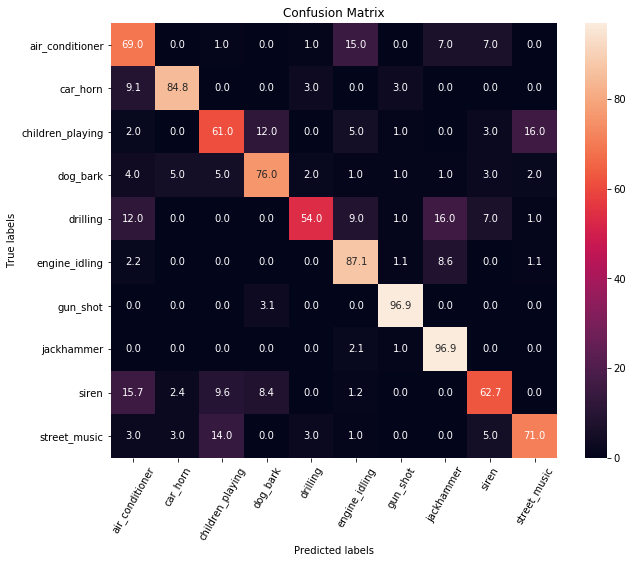

In [16]:
report.plot_confusion(cm, urbansound8k.classnames, percent=True);

a 0.8996478873239436


array([[167.,   2.,   9.,   1.,   1.],
       [  1., 151.,  10.,  12.,   1.],
       [  1.,   5., 113.,   2.,   1.],
       [  0.,   4.,   7.,  50.,   0.],
       [  0.,   0.,   0.,   0.,  30.]])

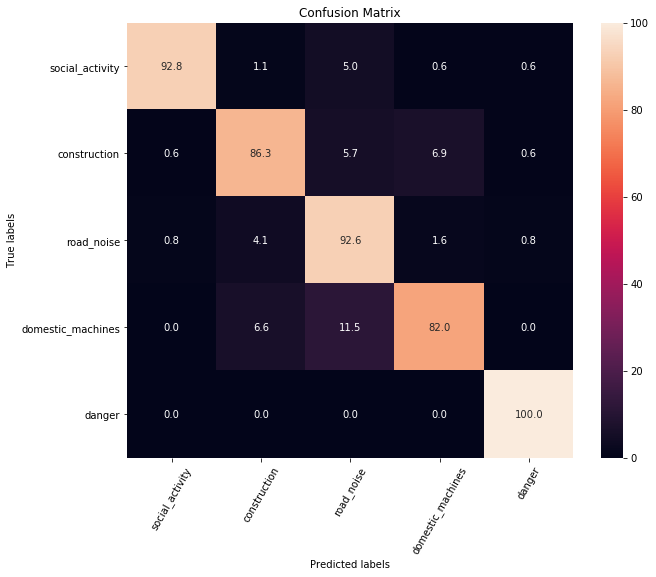

In [19]:
ccm = cm = confusion['test_foreground'][0]
gcm, gnames = report.grouped_confusion(cm, report.groups)
print('a', report.cm_accuracy(gcm))
report.plot_confusion(gcm, gnames, percent=True);
gcm

In [197]:
mm = pandas.read_csv('scan.csv')
mm.describe()

,Unnamed: 0,pool_t,pool_f,kernels_start,kernel_t,kernel_f,fully_connected,maccs_frame,flash_usage,ram_usage_max,ram_usage_min
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,81.000000,81.000000
mean,40.000000,2.209877,2.506173,39.839506,4.382716,5.296296,72.419753,3.634746e+07,1.378289e+06,77816.296296,77816.296296
std,23.526581,0.409758,0.709286,14.850469,1.662588,2.238551,32.931316,3.703077e+07,1.096727e+06,39930.529437,39930.529437
min,0.000000,2.000000,2.000000,17.000000,3.000000,3.000000,16.000000,1.724873e+06,1.059300e+05,14700.000000,14700.000000
25%,20.000000,2.000000,2.000000,26.000000,3.000000,3.000000,44.000000,1.185383e+07,5.712300e+05,46620.000000,46620.000000
50%,40.000000,2.000000,2.000000,38.000000,3.000000,5.000000,70.000000,2.464952e+07,1.063650e+06,72570.000000,72570.000000
75%,60.000000,2.000000,3.000000,54.000000,5.000000,7.000000,106.000000,4.750779e+07,1.820000e+06,96720.000000,96720.000000
max,80.000000,3.000000,4.000000,63.000000,7.000000,9.000000,127.000000,2.249937e+08,5.760000e+06,163160.000000,163160.000000


In [198]:
valid = mm[(mm.flash_usage < 1024e3) & (mm.ram_usage_max < 64e3) & (mm.maccs_frame < 10e6)]
valid.describe()

,Unnamed: 0,pool_t,pool_f,kernels_start,kernel_t,kernel_f,fully_connected,maccs_frame,flash_usage,ram_usage_max,ram_usage_min
count,19.00000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000
mean,28.00000,2.368421,3.157895,24.894737,3.842105,3.842105,72.842105,5.656803e+06,351844.210526,31992.105263,31992.105263
std,21.31249,0.495595,0.764719,7.377855,1.537066,1.384965,29.640931,2.916903e+06,202546.322749,12165.659583,12165.659583
min,0.00000,2.000000,2.000000,17.000000,3.000000,3.000000,18.000000,1.724873e+06,105930.000000,14700.000000,14700.000000
25%,9.50000,2.000000,3.000000,20.000000,3.000000,3.000000,53.000000,3.274884e+06,204070.000000,23830.000000,23830.000000
50%,26.00000,2.000000,3.000000,23.000000,3.000000,3.000000,73.000000,6.601418e+06,332370.000000,31640.000000,31640.000000
75%,42.00000,3.000000,4.000000,27.500000,4.000000,5.000000,88.000000,7.921788e+06,441490.000000,38090.000000,38090.000000
max,77.00000,3.000000,4.000000,45.000000,7.000000,7.000000,126.000000,9.793088e+06,912390.000000,59570.000000,59570.000000


In [202]:
valid.maccs_frame

0     2032377
1     6811465
3     4093144
4     1742671
9     1727929
10    7167771
21    3502902
22    9422940
24    3046866
26    9735797
29    6719781
30    7395062
35    6601418
40    4460498
44    1724873
48    4018709
52    8448513
57    9033444
77    9793088
Name: maccs_frame, dtype: int64

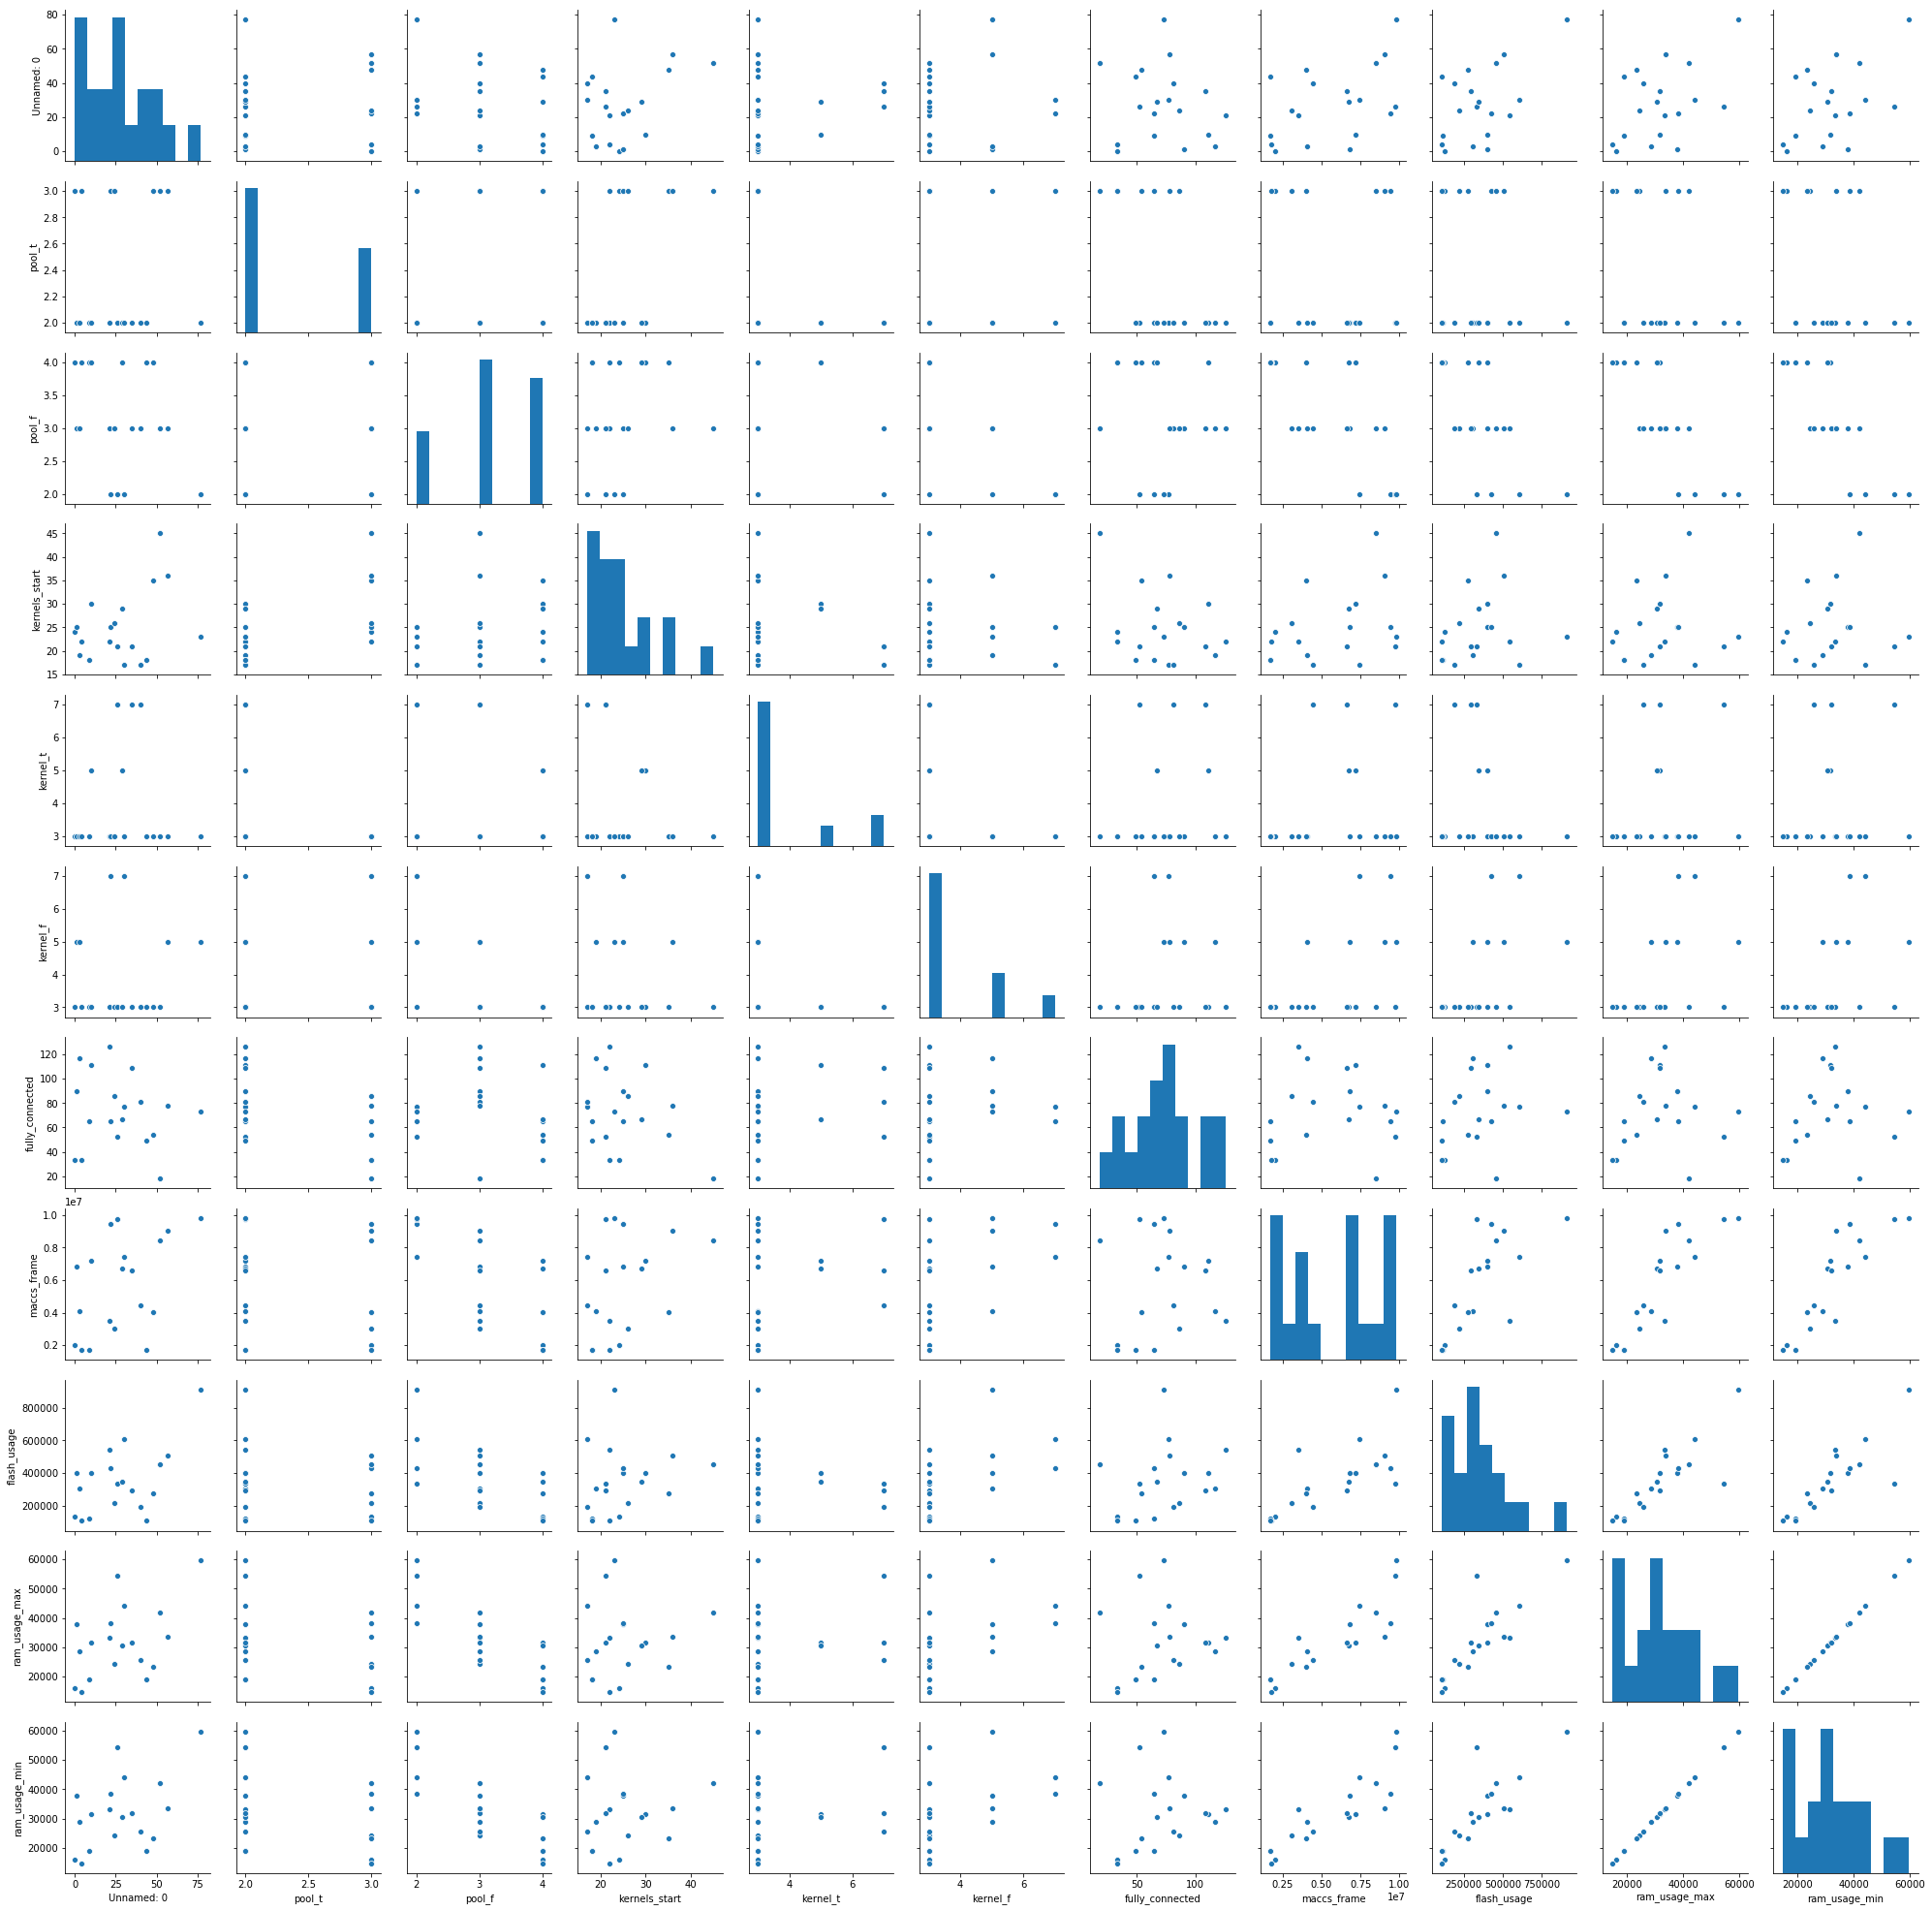

In [199]:
seaborn.pairplot(valid)

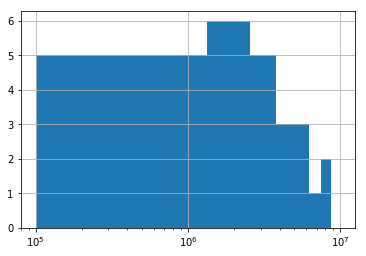

In [171]:
ax = mm.maccs_frame.hist(bins=8, range=(1e5, 1e7))
ax.set_xscale('log')

### df.voted_val_acc.hist(bins=50)

In [19]:
df.sort_values('voted_val_acc', ascending=False)

,acc,epoch,fold,loss,model,run,template,top3,val_acc,val_loss,val_top3,voted_val_acc
39,0.674433,40,0,0.976088,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.685962,0.973320,NaN,0.769759
42,0.677767,43,0,0.963537,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.652885,1.047280,NaN,0.758305
13,0.427267,14,0,1.629935,data/models/ldcnn20k60-20190311-0423-302d-fold...,20190311-0423-302d,ldcnn20k60,NaN,0.668462,1.209446,NaN,0.751432
37,0.669867,38,0,0.986234,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.667500,0.985157,NaN,0.749141
48,0.690900,49,0,0.944461,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.663846,1.053781,NaN,0.730813
13,0.509067,14,0,1.318073,data/models/sbcnn44k128aug-20190303-2355-abd0-...,20190303-2355-abd0,sbcnn44k128aug,NaN,0.700200,1.175862,NaN,0.730813
13,0.403667,14,0,1.699590,data/models/ldcnn20k60-20190312-0012-49b7-fold...,20190312-0012-49b7,ldcnn20k60,NaN,0.656923,1.286173,NaN,0.728522
43,0.685533,44,0,0.963850,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.651346,1.057788,NaN,0.727377
9,0.382267,10,0,1.770334,data/models/ldcnn20k60-20190312-0012-49b7-fold...,20190312-0012-49b7,ldcnn20k60,NaN,0.638846,1.370502,NaN,0.727377
38,0.674867,39,0,0.982806,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.659038,1.045083,NaN,0.725086


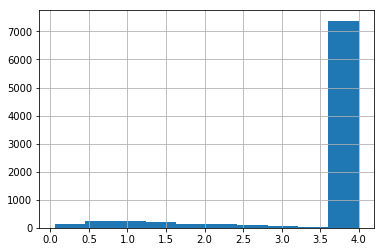

In [157]:
(data.end - data.start).hist()

In [24]:
import keras

model = keras.models.load_model('mobilenet.hdf5')


In [84]:
model.layers[0].__class__.__name__

'InputLayer'

In [107]:
def layer_info(model):

    df = pandas.DataFrame({
        'name': [ l.name for l in model.layers ] ,
        'type': [ l.__class__.__name__ for l in model.layers ],
        'shape_in': [ l.get_input_shape_at(0)[1:] for l in model.layers ],
        'shape_out': [ l.get_output_shape_at(0)[1:] for l in model.layers ],
    })
    df['size_in'] = df.shape_in.apply(numpy.prod)
    df['size_out'] = df.shape_out.apply(numpy.prod)
    df['activations_ram'] = 4*(df.size_in + df.size_out)
    return df

foo = layer_info(model)

In [164]:
model_path = 'sbcnn16k30.hdf5'
model = keras.models.load_model(model_path)
out_path = 'out/'
stats = stm32convert.generatecode(model_path, out_path,
                                  name='network', model_type='keras', compression=None)
foo = layer_info(model)

/usr/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [162]:
def layer_sizes(stm_stats):
    
    activation_types = set(['_output_array', '_output_in_array', '_output_out_array'])
    weight_types = set(['_weights_array', '_bias_array'])
    array_types = activation_types.union(weight_types)
    
    def lazy_add(d, key, value):
        if d.get(key, None) is None:
            d[key] = 0
        d[key] += value
    
    activations = {}
    weights = {}
    
    for name, size in stm_stats['arrays'].items():
        
        known = False
        for suffix in array_types:
            if name.endswith(suffix): 
                layer_name = name.rstrip(suffix)
                out = activations if suffix in activation_types else weights
                lazy_add(out, layer_name, size)
                known = True

        assert known, 'Unknown array {}'.format(name)

    layers = set(activations.keys()).union(set(weights.keys())) 
          
    df = pandas.DataFrame({
        'activations': [ activations.get(n, math.nan) for n in layers  ],
        'weights': [ weights.get(n, math.nan) for n in layers ],
    }, dtype='int', index=list(layers))
        
    return df

sst = layer_sizes(stats)
sst

,activations,weights
activation_9,64,NaN
dense_4,10,650
input_0,2160,NaN
activation_7,1152,NaN
conv2d_6,576,20784
activation_6,5760,NaN
dense_3,64,18496
activation_10,10,NaN
conv2d_5,1152,10416
conv2d_4,5760,240


In [173]:
jj = foo.join(sst, on='name', how='inner')
jj

,name,type,shape_in,shape_out,size_in,size_out,activations_ram,activations,weights
0,conv2d_4,Conv2D,"(30, 72, 1)","(30, 72, 24)",2160,51840,216000,5760,240
2,activation_6,Activation,"(10, 24, 24)","(10, 24, 24)",5760,5760,46080,5760,NaN
3,conv2d_5,Conv2D,"(10, 24, 24)","(10, 24, 48)",5760,11520,69120,1152,10416
5,activation_7,Activation,"(3, 8, 48)","(3, 8, 48)",1152,1152,9216,1152,NaN
6,conv2d_6,Conv2D,"(3, 8, 48)","(1, 6, 48)",1152,288,5760,576,20784
9,dense_3,Dense,"(288,)","(64,)",288,64,1408,64,18496
10,activation_9,Activation,"(64,)","(64,)",64,64,512,64,NaN
12,dense_4,Dense,"(64,)","(10,)",64,10,296,10,650
14,activation_10,Activation,"(10,)","(10,)",10,10,80,10,NaN


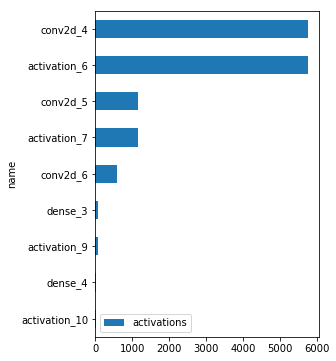

In [174]:
jj.sort_index(ascending=False).plot(figsize=(4, 6), kind='barh', y='activations', x='name')


In [28]:
model.layers[0].get_output_shape_at(0)

(None, 60, 31, 1)

In [158]:
(data.end-data.start).mode()

0    4.0
dtype: float64

In [159]:
folds, test = urbansound8k.folds(data)
len(folds), folds[0][0].shape, folds[0][1].shape, test.shape

(9, (7022, 8), (873, 8), (837, 8))

In [207]:
p = '../../jobs/sbcnn.orig-2019-02-26-02-12-2c8ffebe-fold7/e10-v13.78.model.hdf5'
model = keras.models.load_model(p)
model

fold
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

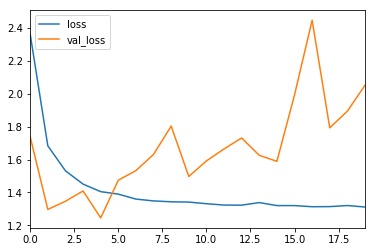

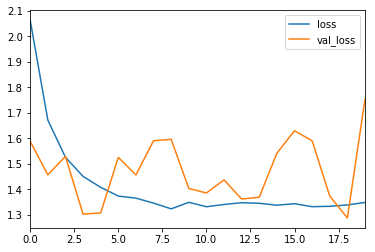

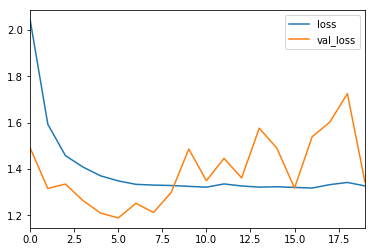

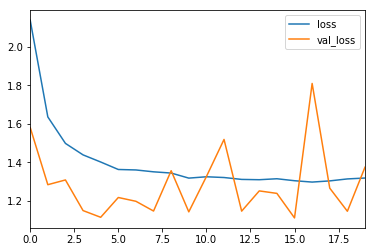

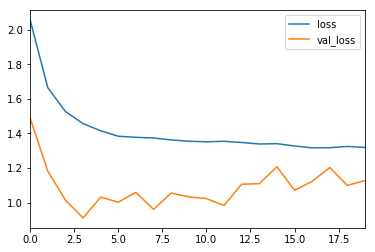

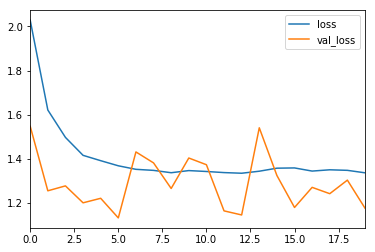

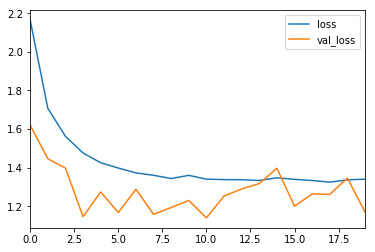

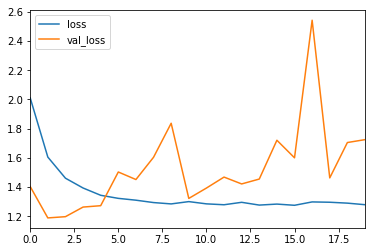

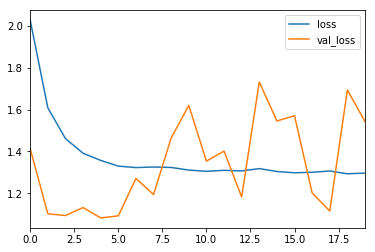

In [177]:
# jobs/sbcnn.orig-2019-02-26-13-56-26d5f8ac-fold8/history.csv



df.groupby('fold').plot(y=['loss', 'val_loss'])

fold
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

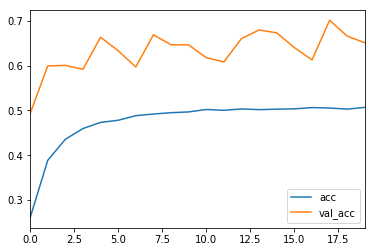

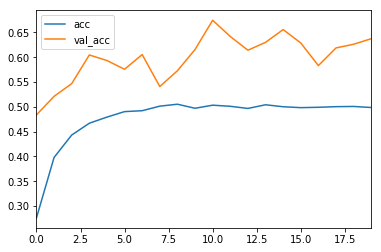

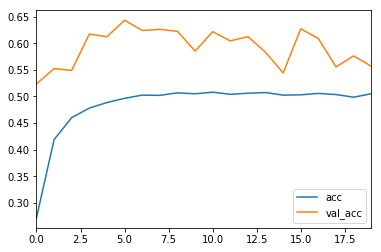

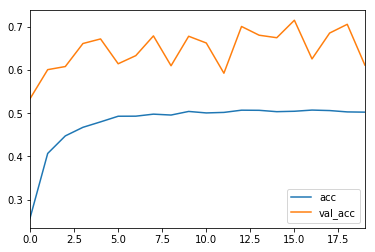

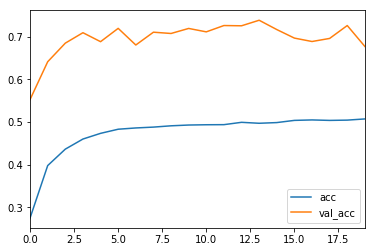

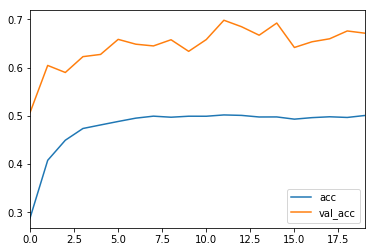

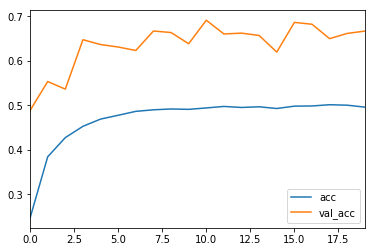

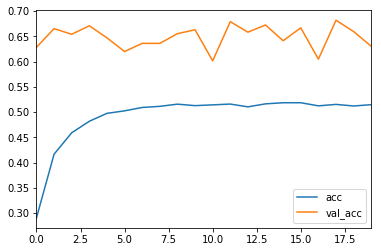

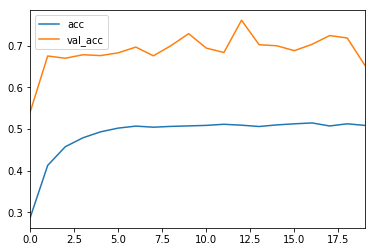

In [178]:
df.groupby('fold').plot(y=['acc', 'val_acc'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5d0db128>],
      dtype=object)

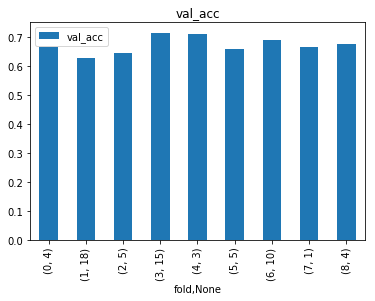

In [179]:
best_by_loss = df.groupby('fold').apply(lambda d: d.sort_values('val_loss', ascending=True).head(1))
best_by_loss.plot(y='val_acc', kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5d05e4a8>],
      dtype=object)

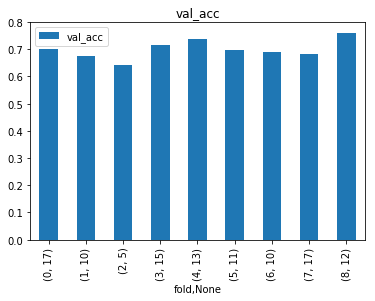

In [180]:
best_by_acc = df.groupby('fold').apply(lambda d: d.sort_values('val_acc', ascending=False).head(1))
best_by_acc.plot(y='val_acc', kind='bar', subplots=True)

In [181]:
# Takes 30 seconds+
models = best_by_loss['model'].apply(lambda p: keras.models.load_model(p))


In [221]:
def score(model, data):
    predictions = predict_windowed(settings, model, data, method='majority', overlap=0.1)
    s = accuracy_score(data.classID, predictions)
    print('acc', s)
    return s

In [192]:
sbcnn44k128 = scores

In [222]:
scores = [ score(m, test) for m in models ]

acc 0.6857825567502986
acc 0.7060931899641577
acc 0.6152927120669056
acc 0.7371565113500598
acc 0.7108721624850657
acc 0.6786140979689367
acc 0.7132616487455197
acc 0.6200716845878136
acc 0.7216248506571087


In [200]:
val_scores = [ score(m, folds[i][1]) for i, m in enumerate(models) ]
numpy.mean(val_scores)

acc 0.722794959908362
acc 0.6565315315315315
acc 0.6810810810810811
acc 0.7575757575757576
acc 0.7435897435897436
acc 0.6816524908869988
acc 0.7494033412887828
acc 0.6687344913151365
acc 0.7365196078431373


0.7108758894467256

In [224]:
sbcnn44k128

[0.6810035842293907,
 0.7084826762246117,
 0.6188769414575866,
 0.7323775388291517,
 0.7168458781362007,
 0.6821983273596177,
 0.7108721624850657,
 0.6140979689366786,
 0.7192353643966547]

In [ ]:
# TODO: calculate per-class accuracy. For each fold
# TODO: compare single-frame accuracy (from training) versus voted accuracy
# TODO: compare no-overlap, 50% overlap and 10% overlap

In [151]:
folds[8][1].shape

(816, 8)

In [187]:
df = pandas.DataFrame({'test_acc': sbcnn16k32 })
df.to_csv('../sbcnn16k32.results.csv')

(0.6, 0.85)

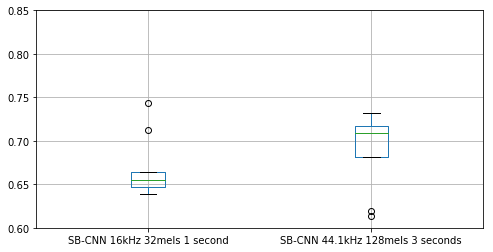

In [199]:
df = pandas.DataFrame({
    'SB-CNN 16kHz 32mels 1 second': sbcnn16k32,
    'SB-CNN 44.1kHz 128mels 3 seconds': sbcnn44k128,
})
df.to_csv('results.csv')
ax = df.boxplot(figsize=(8,4))
ax.set_ylim((0.6, 0.85))

In [223]:
numpy.mean(scores), numpy.median(scores)

(0.6876410460639851, 0.7060931899641577)

In [225]:
sbcnn16k32

[0.6547192353643967,
 0.6391875746714456,
 0.6463560334528077,
 0.6571087216248507,
 0.6642771804062126,
 0.7431302270011948,
 0.6511350059737157,
 0.7120669056152927,
 0.6403823178016727]

In [226]:
numpy.mean(sbcnn16k32)

0.6675959113235099